<a href="https://colab.research.google.com/github/kyieon/Colab_DeepL/blob/master/Dacon7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#cd "/content/drive/My Drive/Colab Notebooks/Dacon7"
#!unzip -q data.zip
#!ls

In [97]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# 실제 이미지 보기
# test_df = pd.read_csv('test.csv', index_col=0)

# for i in range(5):  
#   img = np.array(test_df.iloc[i, 1:]).reshape(28, 28).astype(np.float)
#   plt.imshow(img)
#   plt.show()

In [145]:
# 트레이닝

train_df = pd.read_csv('train.csv', index_col=0)

x_train = np.array(train_df.iloc[:, 2:]).reshape(-1, 28, 28, 1).astype(np.float)
y_train = to_categorical(train_df['digit'].values.astype('int32'), 10)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.9)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hits = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 128)             

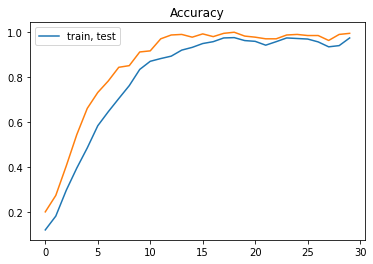

In [142]:
#예측모델 체크

acc = hits.history['accuracy']
val_acc = hits.history['val_accuracy']
loss = hits.history['loss']
val_loss = hits.history['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.legend(['train, test'], loc='upper left')
plt.show()

In [ ]:
#예측하기
test_df = pd.read_csv('test.csv', index_col=0)
x_predict = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28, 1).astype(np.float)
results = np.argmax(model.predict(x_predict), axis=1)

In [162]:
#제출
submission_df = pd.read_csv('submission.csv', index_col=0)
submission_df.digit = results2
submission_df.to_csv('result.csv')